<a href="https://colab.research.google.com/github/rhythmd18/AsteroidHazardPredictor/blob/main/AsteroidHazardPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining whether or not an Asteroid is hazardous.

## 1. Importing the desired libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

In [ ]:
## Reading the data into a pandas dataframe
df = pd.read_csv('/content/nasa.csv')

#### Let's look at the dataset. It's a good idea to do so before processing it to get a feel of what the data looks like.

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df['Orbit ID']

0       17
1       21
2       22
3        7
4       25
        ..
4682     4
4683     2
4684    17
4685     6
4686    13
Name: Orbit ID, Length: 4687, dtype: int64

In [ ]:
# Checking the shape of the dataset(number of row and columns)
df.shape

(4687, 40)

In [ ]:
# Getting some info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

## 2. Preprocessing the data
We now try to process the data to make it fit for training.

In [ ]:
# Dropping the columns which do not carry any significant value
df = df.drop(columns=['Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID'])

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.Equinox.value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [ ]:
df['Equinox'].nunique()

1

In [ ]:
# Dropping the 'Equinox' column since it holds only one unique value
df = df.drop(columns=['Equinox'])

## 3. Visualizing the data
Let's try to visualize the data to get more insights. We can process it further looking at the visualizations to make additional improvements if required.

<ipython-input-12-129813cc8785>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

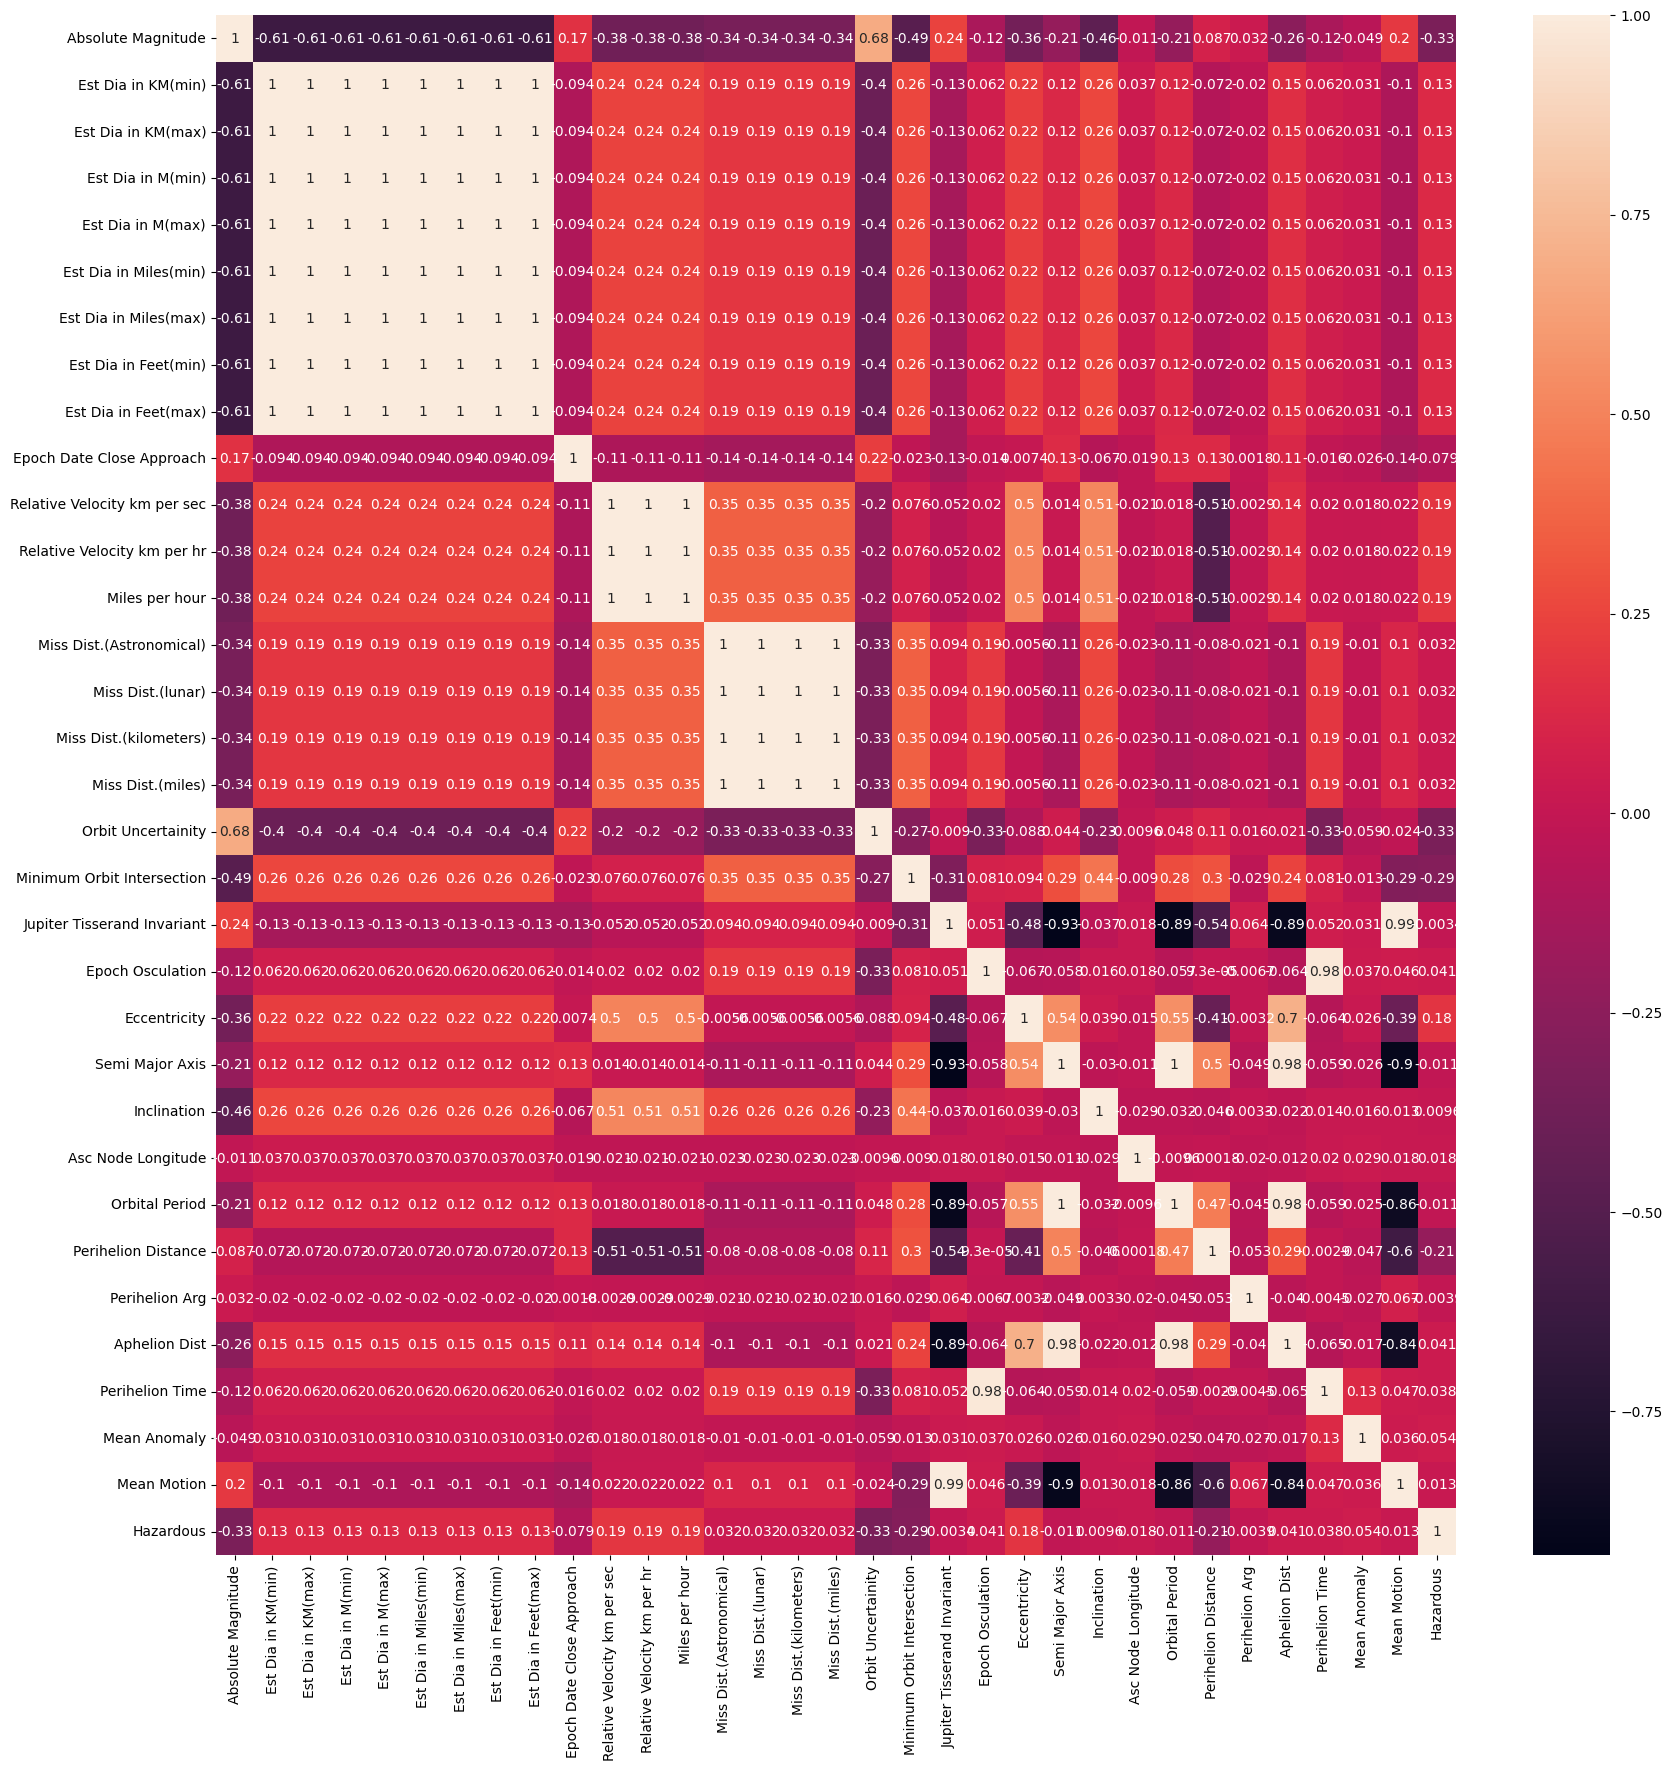

In [ ]:
# Creating a correlation matrix to determine which columns hold most value and which could possibly be omitted.
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, ax=ax)

We can remove multiple columns in the dataset which are highly correlated and hence carry similar information. This ain't going to add any value to the model at all. <b>However, we also need to make sure that the columns that would be removed do not have a high correlation with the target variable. That would instead lead to loss of the deterministic features.</b>

In [ ]:
# Let's drop the following columns since they are not going to add any value
df = df.drop(columns=[
    'Est Dia in KM(min)',
    'Est Dia in KM(max)',
    'Est Dia in M(min)',
    'Est Dia in M(max)',
    'Est Dia in Miles(min)',
    'Est Dia in Miles(max)',
    'Est Dia in Feet(min)',
    'Est Dia in Feet(max)',
    'Relative Velocity km per sec',
    'Relative Velocity km per hr',
    'Miss Dist.(lunar)',
    'Miss Dist.(kilometers)',
    'Miss Dist.(Astronomical)',
    'Orbit Uncertainity',
    'Semi Major Axis',
    'Orbital Period'
])

In [ ]:
# Viewing the dataset again
df.head()

,Absolute Magnitude,Close Approach Date,Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Orbit Determination Date,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,1995-01-01,788947200000,13680.509944,38993336.0,2017-04-06 08:36:37,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,1995-01-01,788947200000,40519.173105,35603420.0,2017-04-06 08:32:49,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,1995-01-08,789552000000,16979.661798,4736657.5,2017-04-06 09:20:19,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,1995-01-15,790156800000,24994.839864,26522368.0,2017-04-06 09:15:49,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,1995-01-15,790156800000,22012.954985,37910368.0,2017-04-06 08:57:58,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [ ]:
df.shape

(4687, 19)

## 3. Cleaning the data
We check for null values in the dataset and try to get rid of them.

In [ ]:
df.isna().sum()

Absolute Magnitude             0
Close Approach Date            0
Epoch Date Close Approach      0
Miles per hour                 0
Miss Dist.(miles)              0
Orbit Determination Date       0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Inclination                    0
Asc Node Longitude             0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64

<b>We see that there are no null values in the dataset. So, we're good to go!</b>

In [ ]:
df.describe()

,Absolute Magnitude,Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4.687000e+03,4687.000000,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,1.179881e+12,31251.307268,2.386902e+07,0.082320,5.056111,2.457724e+06,0.382569,13.373844,172.157275,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,1.981540e+11,16314.209644,1.355279e+07,0.090300,1.237818,9.202975e+02,0.180444,10.936227,103.276777,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,7.889472e+11,750.489149,1.653462e+04,0.000002,2.196000,2.450164e+06,0.007522,0.014513,0.001941,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,1.015574e+12,18863.475327,1.240212e+07,0.014585,4.049500,2.458000e+06,0.240858,4.962341,83.081208,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,1.203062e+12,28896.026390,2.463595e+07,0.047365,5.071000,2.458000e+06,0.372450,10.311836,172.625393,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,1.355558e+12,40437.892430,3.570935e+07,0.123593,6.019000,2.458000e+06,0.512411,19.511681,255.026909,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,1.473318e+12,99841.227826,4.646713e+07,0.477891,9.025000,2.458020e+06,0.960261,75.406667,359.905890,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Let's perform Machine Learning now.

## 1. Separating the labels and the features

In [ ]:
y = df['Hazardous'].astype(int)
X = df.drop(columns=['Hazardous'])

In [ ]:
# Making sure that the features dataset consists of only numerical values.
X = X.select_dtypes(include='number')

## 2. Splitting the dataset into a training set and a test set(We'll use the `train_test_split` function of sklearn).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Looking at the training features
X_train.head()

,Absolute Magnitude,Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
2008,23.900,1155020400000,28119.332659,9174649.00,0.002032,5.646,2458000.5,0.211665,23.800818,311.952241,0.848853,85.634392,1.304681,2.458111e+06,262.775685,0.882108
1456,21.700,1066806000000,51663.430845,42144780.00,0.028823,5.510,2458000.5,0.277439,17.288221,56.350227,0.806759,72.473954,1.426295,2.458159e+06,227.781681,0.835411
1699,27.197,1105776000000,21035.233779,32903876.00,0.002240,6.091,2458000.5,0.345840,2.500099,6.219294,0.645276,294.907453,1.327564,2.457914e+06,87.104049,1.006031
4594,24.900,1465369200000,16763.573505,3919378.75,0.036585,3.626,2458000.5,0.498831,2.649782,42.858588,1.027167,233.271114,3.071912,2.457563e+06,146.878774,0.335907
4396,24.200,1446969600000,8765.762202,9138842.00,0.013829,6.354,2458000.5,0.164114,1.293864,233.326790,0.788825,332.270038,1.098574,2.458148e+06,201.172410,1.075111


In [ ]:
# Looking at the training labels
y_train.head()

2008    0
1456    1
1699    0
4594    0
4396    0
Name: Hazardous, dtype: int64

## 3. Standardizing the features data.

In [ ]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Creating the model(We'll use the `LogisticRegression` model from sklearn).

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# model.fit(X_train, y_train)

LogisticRegression()

## 5. Calculating the accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_scaled)
# pred = model.predict(X_test)
score = accuracy_score(pred, y_test)
print(f"Test accuracy: {score * 100:.2f}%")

Test accuracy: 95.20%


<b>We got a pretty good accuracy of about <u>95.20%</u> on the test data.</b>

# Let's build a Logistic Regression model from scratch(experimental)
This will help us understand what goes on underneath the hood. We will use the same pre-processed data that we used above. We'll use <b>$w$</b> as the weights and <b>$b$</b> as the bias.

## 1. Let's first define the sigmoid function
The sigmoid function used in logistic regression is given as:
### $$g(z) = \frac{1}{1+e^{-z}}\tag{1}$$
where
### $$z = wx + b$$

In [ ]:
def sigmoid(z):
    # Implementing equation (1) above
    return 1 / (1 + np.exp(-z))

## 2. Let's define a cost function
We know that the logistic loss is given by:
### $$L(f_{w,b}(x), y) = -[y log (f_{w,b}(x)) + (1 - y) log (1 - f_{w,b}(x)]\tag{2}$$

And the cost function is the average loss taken over all the examples
### $$J(w, b) = \frac{1}{m}\sum[L(f_{w,b}(x), y)]\tag{3}$$

In [ ]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b # z = wx + b
    f_wb = sigmoid(z)

    # Implementing equation (3) above to find the loss of an individual example
    cost = -(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    cost = np.sum(cost) / m

    return cost

## 3. Let's compute the gradients $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to perform gradient descent.

The gradients are given by:
### $$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum(f_{w,b}(x) - y)x\tag{4}$$
### $$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum(f_{w,b}(x) - y)\tag{5}$$

In [ ]:
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    err = f_wb - y

    # Implementing equations (4) and (5)
    dj_dw = np.dot(X.T, err) / m # Equation (4)
    dj_db = np.sum(err) / m # Equation (5)

    return dj_dw, dj_db

## 4. Now we define a function that implements the gradient descent algorithm.
The gradient descent algorithm is defined as follows:
### $$\begin{align*} \text{repeat}&\text{ until convergence} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{6}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, iterations):
    # Creating a variable to store the cost after each iteration
    J_history = []

    # Storing the initialized parameters w_in and b_in
    w = copy.deepcopy(w_in)
    b = b_in

    # Performing updation of the parameters w and b implementing equation (6) above
    for i in range(iterations):
        # Collecting the gradients at each iteration
        dj_dw, dj_db = compute_gradients(X, y, w, b)

        # Implementaion equation (6)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Storing the cost after each iteration for graphing
        if i < 10000:
            J_history.append(compute_cost(X, y, w, b))
        if i % math.ceil(iterations / 100) == 0:
            print(f"Iteration: {i:4d}, Cost: {J_history[-1]}")

    return w, b, J_history

In [ ]:
# Converting the pandas dataframes to numpy arrays to make the data compatible to getting trained by our model
X_train_arr = np.array(X_train_scaled)
X_test_arr = np.array(X_test_scaled)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
print(X_train_arr)
print(y_train_arr)

[[ 0.55590343 -0.12500999 -0.18475319 ...  0.40501793  0.75433018
   0.4160877 ]
 [-0.20162727 -0.57001094  1.26921093 ...  0.45436826  0.42776719
   0.27869502]
 [ 1.69116648 -0.37342527 -0.62223121 ...  0.20288844 -0.88503222
   0.78070051]
 ...
 [ 0.07383844 -0.66631521 -0.30627862 ...  0.31753779  1.4272144
   0.77170457]
 [-0.75255868  1.45363194 -0.9035282  ...  0.35453887  1.19327573
   0.23865568]
 [ 1.48560019 -0.71556605 -0.67765029 ...  0.14178035 -0.10803234
   1.25214232]]
[0 1 0 ... 0 1 0]


## 5. Let's perform the training.

In [ ]:
# Initializing the parameters w and b
w_in  = np.zeros_like(X_train_arr[0])
b_in  = 0.0

# Setting the values for the learning rate alpha and the number of iterations for the gradient descent
alpha = 0.01
iters = 100000

# Performing gradient descent
w_out, b_out, J_hist = gradient_descent(X_train_arr, y_train_arr, w_in, b_in, alpha, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration:    0, Cost: 0.6915409748212104
Iteration: 1000, Cost: 0.3188488109596784
Iteration: 2000, Cost: 0.2670797159030483
Iteration: 3000, Cost: 0.24181681152740098
Iteration: 4000, Cost: 0.22588160048413045
Iteration: 5000, Cost: 0.21461881749502762
Iteration: 6000, Cost: 0.20609798655960562
Iteration: 7000, Cost: 0.19935196732575033
Iteration: 8000, Cost: 0.19383579810646195
Iteration: 9000, Cost: 0.18921554565756687
Iteration: 10000, Cost: 0.1852768902271975
Iteration: 11000, Cost: 0.1852768902271975
Iteration: 12000, Cost: 0.1852768902271975
Iteration: 13000, Cost: 0.1852768902271975
Iteration: 14000, Cost: 0.1852768902271975
Iteration: 15000, Cost: 0.1852768902271975
Iteration: 16000, Cost: 0.1852768902271975
Iteration: 17000, Cost: 0.1852768902271975
Iteration: 18000, Cost: 0.1852768902271975
Iteration: 19000, Cost: 0.1852768902271975
Iteration: 20000, Cost: 0.1852768902271975
Iteration: 21000, Cost: 0.1852768902271975
Iteration: 22000, Cost: 0.1852768902271975
Iteration: 230

## 6. Visualizing the training process(Cost vs iteration)
This helps us visualize the change in cost with every iteration while performing gradient descent.

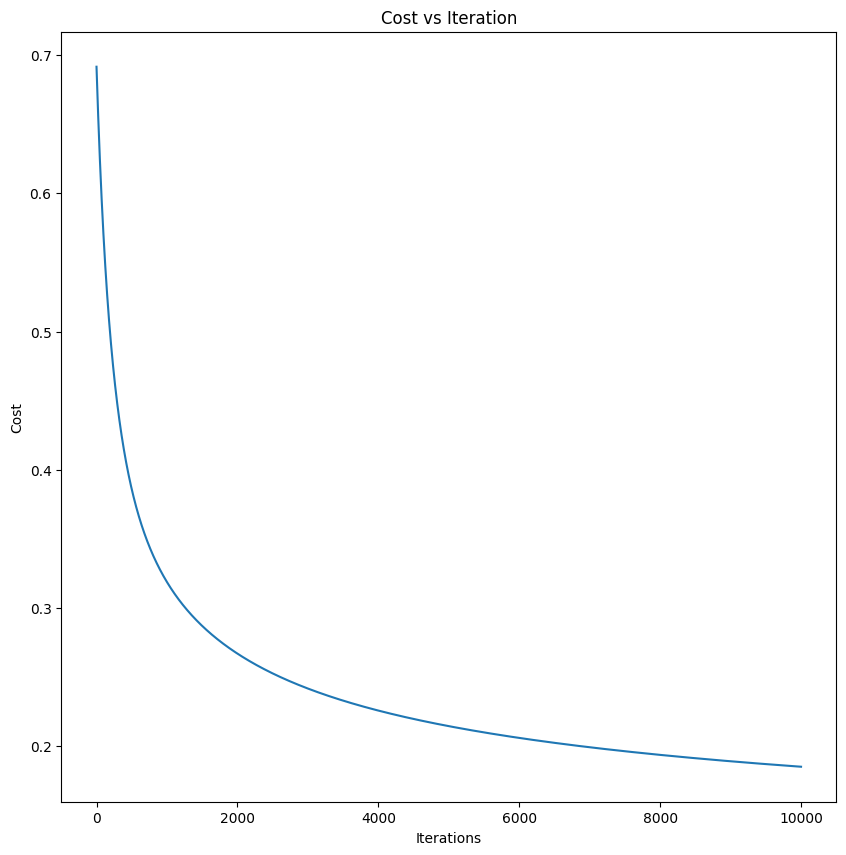

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

## 7. Calculating the accuracy

In [ ]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    # Looping over each example
    for i in range(m):
        z_wb = 0.0
        # Looping over each feature
        for j in range(n):
            # Adding the corresponding term to z_wb
            z_wb += w[j] * X[i, j]

        # Adding bias term
        z_wb += b

        # Calculating the prediction for this example
        f_wb = sigmoid(z_wb)

        # Applying the threshold
        p[i] = f_wb >= 0.5

    return p

In [ ]:
# Computing accuracy on our training set
p = predict(X_test_arr, w_out, b_out)
print(f'Test Accuracy: {np.mean(p == y_test_arr) * 100:.2f}%')

Test Accuracy: 95.31%


<b>We got the test accuracy to be around <u>95.31%</u> which is similar to that of the `LogisticRegression` model of sklearn.</b><br>
<i>That is pretty promising!!</i>

# Making predictions
Run the cell below to get a random asteroid and predict whether or not it is hazardous. We'll use both of the models to make predictions.

In [ ]:
random_index = np.random.randint(0, (X_test_scaled.shape[0]))
random_example = X_test_scaled[random_index]

sklearn_prediction = model.predict([random_example])
actual = y_test.iloc[random_index]

z_wb = np.dot(w_out, random_example) + b_out
f_wb = sigmoid(z_wb)
my_model_prediction = int(f_wb >= 0.5)

print(f"Index of Example:         {random_index}")
print(f"SkLearn Prediction:       {'Hazardous' if sklearn_prediction[0] == 1 else 'Not Hazardous'}")
print(f"My model's Prediction:    {'Hazardous' if my_model_prediction == 1 else 'Not Hazardous'}")
print(f"Actual Value:             {'Hazardous' if actual == 1 else 'Not Hazardous'}")

Index of Example:         754
SkLearn Prediction:       Not Hazardous
My model's Prediction:    Not Hazardous
Actual Value:             Not Hazardous
